# Stochastic Simulation Assignment 2

## Discrete Event Simulation - Simple Queues

_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

1) Queuing theory tells us that for FIFO scheduling the average waiting times are shorter for an
M/M/n queue and a system load ρ and processor capacity μ than for a single M/M/1 queue
with the same load characteristics (and thus an n-fold lower arrival rate). Of course, ρ must be
less than one, but the experiment only becomes interesting when ρ is not much less than one.
Look up and/or derive this theoretical result, at least for n=2. Describe how it is
derived. Can you also give a non-mathematical explanation? 

Statement to prove: $W_{n} \leq W_{1}$ 

Facts & Definitions:

1. systemload 1 server = $\rho_{1} = \frac{\lambda_{1}}{\mu} $ [1]
2. systemload n servers = $\rho_{n} = \frac{\lambda_{n}}{n\mu}$ [2]
3. It is given that the load characteristics of the system are equal, meaning $\rho_{1} = \rho_{n}$ where $\rho$ represents system load [3]
4. Little's law = $L = \lambda W$ [4]

Where \rho represents system load



From 3, we know: $\rho_{1} = \rho_{n}$ because the question gives that the load characteristics of the system are equal we assume $\mu_{1} = \mu_{n}$ 

Hence: $\rho_{1} = \rho_{n} = \frac{\lambda_{1}} {\mu}  = \frac{\lambda_{n}}{n\mu} $ [6]

From  6 we can see that:

$\lambda_{1} = \frac{\lambda_{n}}{n\mu}$, so for a system with n servers there is an n-fold lower arrival rate. [7]


We can rewrite Little law to get an expression for average waiting time W:

$W = \frac{L}{\lambda}$ [4]


We set out to prove $W_{n} \lt W_{1}$ by using 4 and rewriting Little Law, and then substituting in $\lambda$ :


$\frac{L}{\lambda_{n}}$ $\lt$ $\frac{L}{\lambda_{1}}$ 


We assume the average length of the que, $L$, is the same and using 7, we find:


$\frac{L}{\lambda_{n}}$ $\lt$  $\frac{L}{\frac{\lambda_{1}}{n}}$ 


$\frac{L}{\lambda_{n}}$  $\lt$ $\frac{nL}{\lambda_{1}}$ 

So for any n > 1, the average waiting time of a 1 server system is always higher than an n server system. This proof assumes that the system is in a steady state.

2) Write a DES program to verify this for n=1, n=2 and n=4. Make sure that your result
has a high and known statistical significance. How does the number of measurements

3) Also compare the result to that for an M/M/1 queue with shortest job first scheduling,
where you always give priority to the smallest jobs.


4) Now experiment with different service rate distributions. On the one hand try the
M/D/1 and M/D/n queues, on the other hand try a long-tail distribution. For the latter
you may e.g. use a distribution where 75% of the jobs have an exponential distribution
with an average service time of 1.0 and the remaining 25% an exponential distribution
with an average service time of 5.0 (an example of a hyperexponential distribution).
Write your program using SimPy.

## 1. Simulations

In [63]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from simulation import *

### 1.1 Simulation Test: M/M/1 queue, no priority

In [64]:
env = simpy.Environment()
server = MultiServer(env, n=1, lambda_rate=0.95, mu=0.8)

env.process(server.setup_sim(print_progress=True))
env.run(until=100)

Created system with 1 servers and load 1.1874999999999998.
Job 0 arrives at queue at time 1.390268980844442
Job 0 is starting to be processed at time 1.390268980844442
Job 0 is finished at 2.0654943272413884
Job 1 arrives at queue at time 2.8277796821260566
Job 1 is starting to be processed at time 2.8277796821260566
Job 2 arrives at queue at time 3.235247959113558
Job 1 is finished at 3.2490348299779743
Job 2 is starting to be processed at time 3.2490348299779743
Job 3 arrives at queue at time 4.279964569383003
Job 4 arrives at queue at time 4.455350706137637
Job 2 is finished at 4.4708726117623865
Job 3 is starting to be processed at time 4.4708726117623865
Job 5 arrives at queue at time 5.645442410883398
Job 6 arrives at queue at time 5.8648239547344145
Job 7 arrives at queue at time 7.357060072401778
Job 8 arrives at queue at time 8.24051353475412
Job 3 is finished at 8.856082764925393
Job 4 is starting to be processed at time 8.856082764925393
Job 9 arrives at queue at time 9.6208

In [65]:
server.jobs

,jobID,arr_time,proc_time,leave_time,wait_delta
0,0000,1.390269,1.390269,2.065494,0.0
1,0001,2.82778,2.82778,3.249035,0.0
2,0002,3.235248,3.249035,4.470873,0.013787
3,0003,4.279965,4.470873,8.856083,0.190908
4,0004,4.455351,8.856083,10.734512,4.400732
...,...,...,...,...,...
89,0089,94.399048,None,None,None
90,0090,95.325903,None,None,None
91,0091,95.766346,None,None,None
92,0092,96.58866,None,None,None


In [66]:
# Filter completed jobs
completed_jobs = server.jobs[server.jobs['proc_time'].isnull() == False]

print(completed_jobs)
waiting_times = completed_jobs['proc_time'] - completed_jobs['arr_time']
print(f"Average waiting time: {np.mean(waiting_times)}")

   jobID   arr_time  proc_time leave_time wait_delta
0   0000   1.390269   1.390269   2.065494        0.0
1   0001    2.82778    2.82778   3.249035        0.0
2   0002   3.235248   3.249035   4.470873   0.013787
3   0003   4.279965   4.470873   8.856083   0.190908
4   0004   4.455351   8.856083  10.734512   4.400732
..   ...        ...        ...        ...        ...
74  0074  86.100831  94.373141  94.677792    8.27231
75  0075  86.627721  94.677792  94.693599   8.050071
76  0076  86.876289  94.693599  95.390249   7.817309
77  0077  87.054002  95.390249  97.896577   8.336248
78  0078  89.561871  97.896577       None   8.334706

[79 rows x 5 columns]
Average waiting time: 9.627870323916977


### 1.2 Simulation Test: M/M/1 queue with priority

In [67]:
env = simpy.Environment()
server = MultiServerPriority(env, n=1, lambda_rate=0.95, mu=0.8)

env.process(server.setup_sim(print_progress=True))
env.run(until=100)

Created system with 1 servers and load 1.1874999999999998.
Job 0 arrives at queue at time 3.688497811884871
Job 0 is starting to be processed at time 3.688497811884871
Job 0 is finished at 3.750392598359231
Job 1 arrives at queue at time 4.01170364328967
Job 1 is starting to be processed at time 4.01170364328967
Job 1 is finished at 4.749944093952726
Job 2 arrives at queue at time 5.065286744426303
Job 2 is starting to be processed at time 5.065286744426303
Job 2 is finished at 5.5732775399443995
Job 3 arrives at queue at time 7.686047222846112
Job 3 is starting to be processed at time 7.686047222846112
Job 3 is finished at 8.726318905912423
Job 4 arrives at queue at time 8.730517697184016
Job 4 is starting to be processed at time 8.730517697184016
Job 5 arrives at queue at time 9.258526324935373
Job 6 arrives at queue at time 9.537743235606335
Job 4 is finished at 9.967343182999064
Job 6 is starting to be processed at time 9.967343182999064
Job 6 is finished at 10.081394768256079
Job 

In [68]:
server.jobs

,jobID,arr_time,proc_time,leave_time,wait_delta
0,0000,3.688498,3.688498,3.750393,0.0
1,0001,4.011704,4.011704,4.749944,0.0
2,0002,5.065287,5.065287,5.573278,0.0
3,0003,7.686047,7.686047,8.726319,0.0
4,0004,8.730518,8.730518,9.967343,0.0
...,...,...,...,...,...
86,0086,94.2313,95.136307,95.757753,0.905007
87,0087,94.713819,94.790624,95.136307,0.076806
88,0088,96.701951,98.111137,99.592622,1.409186
89,0089,98.615357,99.592622,99.715162,0.977265


### 1.3 M/M/n Simulations with Varying $\rho$

The following procedure runs multiple simulations for $M/M/n$ systems with $n = 1, 2, 4$. Furthermore, different arrival rates are explored ($0.1<\lambda<0.95$ per server), the rate being scaled to the number of servers, so that the total system load $\rho$ is comparable between the different system sizes.

In [159]:
# Simulation parameters
n_range = [1, 2, 4]
mu_base = 1.0
lambda_range = np.arange(0.1, 1.0, 0.1)
extended_lambda_range = np.append(lambda_range, 0.99)
rho_range = extended_lambda_range / mu_base
runtime = 100
n_sims = 100

np.random.seed(13)

In [158]:
print(rho_range)

[0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.99]


In [70]:
# Run simulations for different number of servers n and for different arrival rates
sim_results = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            
            run_results = run_simulation('M/M/n', n, s, 100, lambda_rate=lambda_rate, mu=mu_base)
            sim_results = pd.concat([sim_results, run_results], ignore_index=True)

sim_results.to_csv("sim_results_MMn.csv")

sim_results

Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.


Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers an

KeyboardInterrupt: 

In [71]:
# Load data from previous experiment
sim_results = pd.read_csv("sim_results_MMn.csv", index_col=0)
sim_results

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.10,0,0,15.037383,15.037383,16.776238,0.0
1,1,0.10,0,1,17.749451,17.749451,21.346704,0.0
2,1,0.10,0,2,51.489904,51.489904,52.429061,0.0
3,1,0.10,0,3,57.531185,57.531185,58.557328,0.0
4,1,0.10,0,4,72.471162,72.471162,72.506827,0.0
...,...,...,...,...,...,...,...,...
662078,4,0.95,99,374,97.988285,NaN,NaN,NaN
662079,4,0.95,99,375,98.092352,NaN,NaN,NaN
662080,4,0.95,99,376,98.363402,NaN,NaN,NaN
662081,4,0.95,99,377,98.474026,NaN,NaN,NaN


Mean waiting time for 1 servers rho = 0.9500000000000004: 5.163779348860585
Mean waiting time for 2 servers rho = 0.9500000000000004: 2.9508906507104142
Mean waiting time for 4 servers rho = 0.9500000000000004: 1.9561961748178711


Text(0.5, 1.0, 'M/M/n, average mean Waiting time for different $\\rho$ across 100')

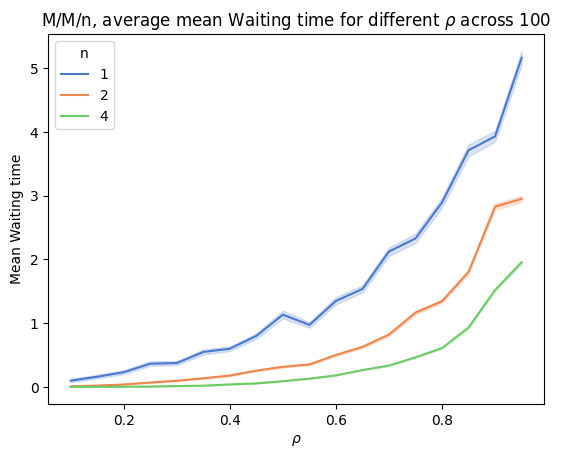

In [72]:
# Plot convergence of waiting time with increasing rho

rho_observed = sim_results['rho'].max()

sim_results_subset = sim_results[sim_results['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/M/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

### 1.4 M/M/1-Priority Simulations with Varying $\rho$

The following procedure repeats the experiment for an $M/M/1$ queue with priority based on the job duration.

In [73]:
sim_results_priority = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

for i, lambda_rate in enumerate(lambda_range):
    for s in range(n_sims):
        run_results = run_simulation('M/M/n-Priority', 1, s, 100, lambda_rate=lambda_rate, mu=mu_base)
        sim_results_priority = pd.concat([sim_results_priority, run_results], ignore_index=True)

sim_results_priority.to_csv("sim_results_MMn_priority.csv")

sim_results_priority

Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers an

KeyboardInterrupt: 

In [74]:
# Load data from previous experiment
sim_results_priority = pd.read_csv("sim_results_MMn_Priority.csv", index_col=0)
sim_results_priority

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.10,0,0,3.196129,3.196129,3.581026,0.000000
1,1,0.10,0,1,4.921595,4.921595,5.039101,0.000000
2,1,0.10,0,2,5.443741,5.443741,7.359367,0.000000
3,1,0.10,0,3,9.384540,9.384540,12.184548,0.000000
4,1,0.10,0,4,14.837778,14.837778,15.875360,0.000000
...,...,...,...,...,...,...,...,...
94477,1,0.95,99,109,98.011181,99.181082,99.732747,1.169901
94478,1,0.95,99,110,98.429951,99.081514,99.181082,0.651563
94479,1,0.95,99,111,98.912240,99.732747,NaN,0.820507
94480,1,0.95,99,112,99.109953,NaN,NaN,NaN


Mean waiting time an M/M/1 system without service-time priority and rho = 0.9500000000000004: 5.163779348860585
Mean waiting time an M/M/1 system with service-time priority and rho = 0.9500000000000004: 1.9324663692268798


C:\Users\nitai\AppData\Local\Temp\ipykernel_43304\3984944414.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(sim_results_priority, x='rho', y='wait_delta', palette='muted', errorbar=('ci', 95), ax=ax, label='1 (priority)')


Text(0.5, 1.0, 'M/M/n, average mean Waiting time for different $\\rho$ across 100')

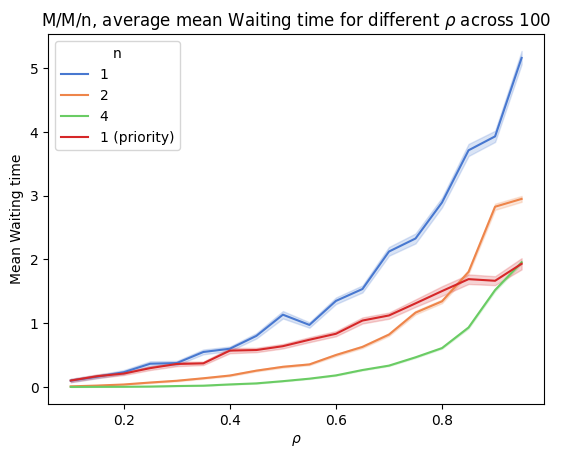

In [76]:
# Plot convergence of waiting time with increasing rho

rho_observed = sim_results['rho'].max()

sim_results_subset_A = sim_results[(sim_results['rho'] == rho_observed) & (sim_results['n'] == 1)]
sim_results_subset_B = sim_results_priority[sim_results_priority['rho'] == rho_observed]
print(f"Mean waiting time an M/M/1 system without service-time priority and rho = {rho_observed}: {sim_results_subset_A['wait_delta'].mean()}")
print(f"Mean waiting time an M/M/1 system with service-time priority and rho = {rho_observed}: {sim_results_subset_B['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
sns.lineplot(sim_results_priority, x='rho', y='wait_delta', palette='muted', errorbar=('ci', 95), ax=ax, label='1 (priority)')
ax.legend(title='n')
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/M/n, average mean Waiting time for different $\\rho$ across {n_sims}')

### 1.5 M/D/n Simulations with Varying $\rho$

In [ ]:
# Run simulations for different number of servers n and for different arrival rates
sim_results_determ = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            run_results = run_simulation('M/D/n', n, s, 100, lambda_rate=lambda_rate, mu=mu_base)
            sim_results_determ = pd.concat([sim_results_determ, run_results], ignore_index=True)

sim_results_determ.to_csv("sim_results_MDn.csv")

sim_results_determ

Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers an

KeyboardInterrupt: 

In [77]:
# Load data from previous experiment
sim_results_determ = pd.read_csv("sim_results_MDn.csv", index_col=0)
sim_results_determ

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.10,0,0,4.013658,4.013658,5.013658,0.0
1,1,0.10,0,1,5.936783,5.936783,6.936783,0.0
2,1,0.10,0,2,15.218259,15.218259,16.218259,0.0
3,1,0.10,0,3,26.613598,26.613598,27.613598,0.0
4,1,0.10,0,4,33.162544,33.162544,34.162544,0.0
...,...,...,...,...,...,...,...,...
661990,4,0.95,99,376,98.558588,NaN,NaN,NaN
661991,4,0.95,99,377,98.704579,NaN,NaN,NaN
661992,4,0.95,99,378,98.748341,NaN,NaN,NaN
661993,4,0.95,99,379,98.922994,NaN,NaN,NaN


Mean waiting time for 1 servers rho = 0.9500000000000004: 3.5774645348259506
Mean waiting time for 2 servers rho = 0.9500000000000004: 2.4058306001513188
Mean waiting time for 4 servers rho = 0.9500000000000004: 1.413172008244666


Text(0.5, 1.0, 'M/D/n, average mean Waiting time for different $\\rho$ across 100')

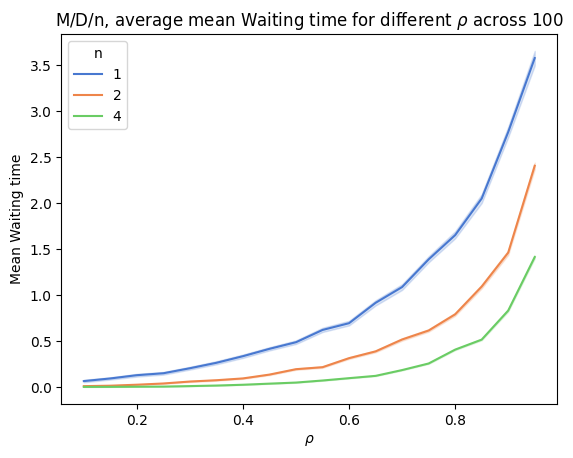

In [78]:
# Plot convergence of waiting time with increasing rho (M/D/n)

rho_observed = sim_results_determ['rho'].max()

sim_results_subset = sim_results_determ[sim_results_determ['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results_determ, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/D/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

### 1.6 M/H/n Simulations with Varying $\rho$

In [ ]:
# Run simulations for different number of servers n and for different arrival rates
sim_results_hyper = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

# Hyperexponential distribution parameters
hyper_prob = 0.75   # Probability for choosing exp. distribution 1
mu2 = 5.0           # Second service rate

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            run_results = run_simulation('M/H/n', n, s, 100, lambda_rate=lambda_rate, mu=mu_base, hyper_prob=hyper_prob, mu2=mu2)
            sim_results_hyper = pd.concat([sim_results_hyper, run_results], ignore_index=True)

sim_results_hyper.to_csv("sim_results_MHn.csv")

sim_results_hyper

Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers an

KeyboardInterrupt: 

In [79]:
# Load data from previous experiment
sim_results_hyper = pd.read_csv("sim_results_MHn.csv", index_col=0)
sim_results_hyper

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.10,0,0,8.224001,8.224001,8.580498,0.00000
1,1,0.10,0,1,33.111680,33.111680,33.386855,0.00000
2,1,0.10,0,2,42.999903,42.999903,44.386244,0.00000
3,1,0.10,0,3,43.800594,44.386244,44.675415,0.58565
4,1,0.10,0,4,51.924512,51.924512,52.459223,0.00000
...,...,...,...,...,...,...,...,...
661303,4,0.95,99,386,98.581312,NaN,NaN,NaN
661304,4,0.95,99,387,98.969620,NaN,NaN,NaN
661305,4,0.95,99,388,99.179562,NaN,NaN,NaN
661306,4,0.95,99,389,99.684763,NaN,NaN,NaN


Mean waiting time for 1 servers rho = 0.9500000000000004: 2.104842439115545
Mean waiting time for 2 servers rho = 0.9500000000000004: 1.0786942572320015
Mean waiting time for 4 servers rho = 0.9500000000000004: 0.48904010180909246


Text(0.5, 1.0, 'M/D/n, average mean Waiting time for different $\\rho$ across 100')

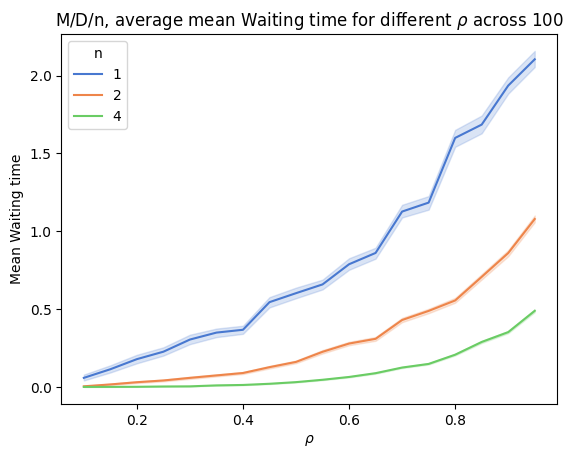

In [ ]:
# Plot convergence of waiting time with increasing rho (M/H/n)

rho_observed = sim_results_hyper['rho'].max()

sim_results_subset = sim_results_hyper[sim_results_hyper['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results_hyper, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/D/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

### 1.7 Comparison of Strategies

Text(0.5, 1.0, 'M/D/n, average mean Waiting time for different $\\rho$ across 100')

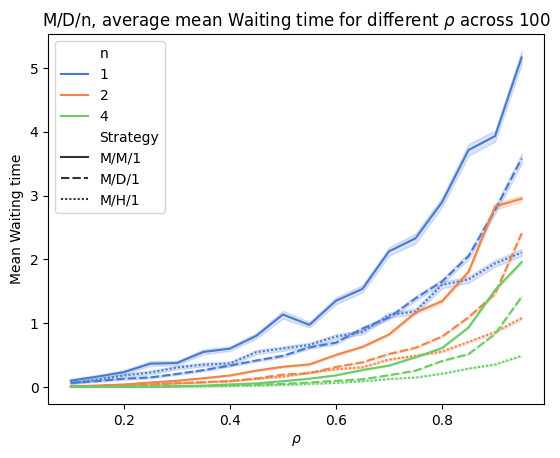

In [80]:
# Combine convergence plots

rho_observed = sim_results_hyper['rho'].max()

sim_results_part1 = sim_results.copy()
sim_results_part1['Strategy'] = 'M/M/1'
sim_results_part2 = sim_results_determ.copy()
sim_results_part2['Strategy'] = 'M/D/1'
sim_results_part3 = sim_results_hyper.copy()
sim_results_part3['Strategy'] = 'M/H/1'

sim_results_all = pd.concat([sim_results_part1, sim_results_part2, sim_results_part3], ignore_index=True)

fig, ax = plt.subplots()
sns.lineplot(sim_results_all, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), style='Strategy', ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/D/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

## 2. Convergence Studies

The procedure below calculates the number of simulations needed until a specific width of the confidence interval is obtained. To obtain better statistical significance, the initial number of simulations `n_sims` is subdivided into smaller portions of size `n_sims/n_sim_partitions`. For each partition of the simulations, the number of results is incrementally increased, with the confidence interval recalculated for each step. Whenever the confindence interval drops beneath a specific threshold, the number of observed simulations before convergence $s_c$ is saved.

By having multiple partitions of the result, this procedure can be applied multiple times for the same set of parameters and statistical operations can be performed on the varying values of $s_c$.

In [ ]:
ci_treshold = 0.1
n_sim_partitions = 5

# DataFrame for saving number of simulations until critical ci threshold
df_rho_s_data = pd.DataFrame(columns=['n', 'rho', 's', 'Permutation'])

sim_results_clean = sim_results[sim_results['wait_delta'].isnull() == False]

entry_ct = 0
for i, n in enumerate(n_range):
    
    sim_results_subset_n = sim_results_clean[sim_results_clean['n'] == n]
    
    for j, rho in enumerate(rho_range):

        sim_results_subset_rho = sim_results_subset_n[sim_results_subset_n['rho'] == rho]
        
        sim_range = range(3, n_sims)

        for p in range(n_sim_partitions):
            
            # Create slices of simulations list (to be viewed as independent simulation sequences)
            slice_start = int(np.floor(n_sims*p/n_sim_partitions))
            slice_end = int(np.floor(n_sims*(p+1)/n_sim_partitions))
            sim_range_partition = sim_range[slice_start : slice_end]

            for k, s in enumerate(sim_range_partition):
                
                # Take an incrementally increasing portion from a slice of the DataFrame to compute the confidence interval on
                sim_results_subset_s = sim_results_subset_rho[(sim_results_subset_rho['simID'] >= slice_start) & (sim_results_subset_rho['simID'] <= s)]

                df_rho_s_data.loc[entry_ct] = [n, rho, k, p]
                ci = st.norm.interval(confidence=0.95, loc=sim_results_subset_s['wait_delta'].mean(), scale=sim_results_subset_s['wait_delta'].sem())
                if(ci[1] - ci[0] <= ci_treshold):
                    # print(f"Converged at {k}")
                    entry_ct += 1
                    break
                entry_ct += 1

C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarn

In [ ]:
df_rho_s_data

df_rho_s_data[df_rho_s_data['n']==2].shape

df_rho_s_data[df_rho_s_data['n']==4]['rho'].unique()

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

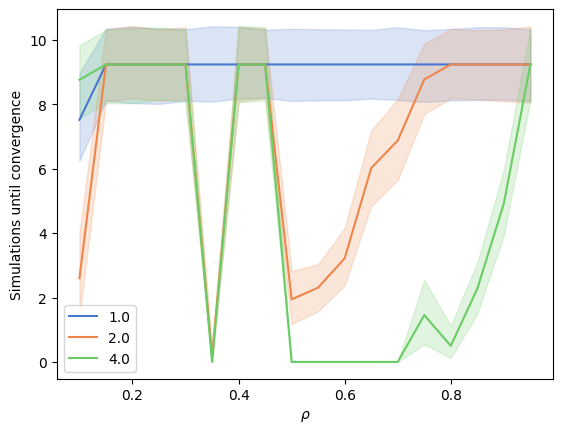

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(df_rho_s_data, x='rho', y='s', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Simulations until convergence')
ax.legend()
plt.show()

In [122]:
t_max = 100
time_steps = 10  # Number of time intervals
step_size = t_max / time_steps  # Calculate the size of each time step


# Initializing dictionaries to store results
results = {}  # Stores results for different 'n' values
results_over_multiple_sims = {} # Stores aggregated results across multiple simulations
results_over_incrementing_timesteps = {}

# Cleaning the data: removing rows where 'wait_delta' is null
sim_results_clean = sim_results[sim_results['wait_delta'].isnull() == False]

# Iterating over a range of 'n' values
for i, n in enumerate(n_range):
    results[n] = {}  # Initializing a sub-dictionary for each 'n' value
    results_over_multiple_sims[n] = {}
    results_over_incrementing_timesteps[n] = {}
    # Filtering the dataset for the current 'n' value
    sim_results_subset_n = sim_results_clean[sim_results_clean['n'] == n]
    
    # Iterating over a range of 'rho' values
    for j, rho in enumerate(rho_range):
        results[n][rho] = {}  # Initializing a sub-dictionary for each 'rho' value
        results_over_multiple_sims[n][rho] = {}
        results_over_incrementing_timesteps[n][rho] = {}
        # Filtering the dataset for the current 'rho' value
        sim_results_subset_rho = sim_results_subset_n[sim_results_subset_n['rho'] == rho]

        # Processing each unique simulation ID
        for sim_id in sim_results_subset_rho['simID'].unique():
            results[n][rho][sim_id] = {}  # Initializing a sub-dictionary for each 'simID'
            results_over_multiple_sims[n][rho][sim_id] = {}
            results_over_incrementing_timesteps[n][rho][sim_id] = {}

            # Filtering the dataset for the current simulation ID
            sim_results_subset_sim_id = sim_results_subset_rho[sim_results_subset_rho['simID'] == sim_id]

            # Adding a cumulative sum column for simIDs to help in data selection
            sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()

            # Identifying the cumulative number for the current simID
            current_cumulative_number = sim_results_subset_rho[sim_results_subset_rho['simID'] == sim_id]['cumulative_sim_id'].iloc[0]

            # Creating a mask to filter rows up to the current simID
            cumulative_mask = sim_results_subset_rho['cumulative_sim_id'] <= current_cumulative_number

            # Applying the mask to get a subset of results incrementally adding simulations
            sim_results_subset_incrementally_adding_sims = sim_results_subset_rho.loc[cumulative_mask]

            # Outputting the length of the subset for debugging or information purposes
            print(len(sim_results_subset_incrementally_adding_sims))

            # Calculating the confidence interval for the 'wait_delta' of the incrementally added simulations
            ci_increment = st.norm.interval(confidence=0.95, loc=sim_results_subset_incrementally_adding_sims['wait_delta'].mean(), scale=sim_results_subset_incrementally_adding_sims['wait_delta'].sem())

            # Storing the confidence interval and sample data in the results dictionary
            results_over_multiple_sims[n][rho][sim_id] = {'ci': ci_increment, 'sample': sim_results_subset_incrementally_adding_sims}

            # Iterating over each sample index
            for sample_index in range(len(sim_results_subset_sim_id)):
                # Calculating the confidence interval for each sample
                ci = st.norm.interval(confidence=0.95, loc=sim_results_subset_sim_id['wait_delta'][:sample_index].mean(), scale=sim_results_subset_sim_id['wait_delta'][:sample_index].sem())

                # Extracting the sample data for the current index
                sample_data = sim_results_subset_sim_id['wait_delta'].iloc[sample_index]

                # Storing the confidence interval and sample data for each sample index
                results[n][rho][sim_id][sample_index] = {'ci': ci, 'sample': sample_data}


            for t_step in range(1, time_steps + 1):
                # Define the upper limit of the current time interval
                current_time_limit = step_size * t_step

                # Filter samples based on the current time condition
                filtered_samples = sim_results_subset_sim_id[sim_results_subset_sim_id['arr_time'] <= current_time_limit]
                print(current_time_limit)
                print(len(filtered_samples))

                # Check if there are enough samples to calculate the confidence interval
                if len(filtered_samples) > 1:
                    # Calculate the confidence interval for the filtered samples
                    ci = st.norm.interval(confidence=0.95, loc=filtered_samples['wait_delta'].mean(), scale=filtered_samples['wait_delta'].sem())

                    # Store the confidence interval and the filtered samples
                    results_over_incrementing_timesteps[n][rho][sim_id][current_time_limit] = {'ci': ci, 'samples': filtered_samples}
                else:
                    # Handle cases with insufficient samples
                    results_over_incrementing_timesteps[n][rho][sim_id][current_time_limit] = {'ci': None, 'samples': []}

# Accessing a specific result 'results_over_incrementing_timesteps' in can be done using the dictionary structure: results_over_incrementing_timesteps[n][rho][sim_id][current_time_limit]
# Accessing a specific result in 'results_over_multiple_sims' can be done using the dictionary structure: results_over_multiple_sims[n][rho][sim_id]
# Accessing a specific result in 'results' can be done using the dictionary structure: results[n][rho][sim_id][sample_index]


C:\Users\nitai\AppData\Local\Temp\ipykernel_43304\1567477000.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


7
10.0
0
20.0
2
30.0
2
40.0
2
50.0
2
60.0
4
70.0
4
80.0
5
90.0
7
100.0
7
8
10.0
0
20.0
3
30.0
3
40.0
3
50.0
6
60.0
8
70.0
8
80.0
9
90.0
10
100.0
12
20
10.0
1
20.0
3
30.0
4
40.0
8
50.0
9
60.0
10
70.0
14
80.0
14
90.0
15
100.0
15
35
10.0
1
20.0
1
30.0
4
40.0
5
50.0
5
60.0
5
70.0
5
80.0
9
90.0
9
100.0
9
44
10.0
0
20.0
1
30.0
2
40.0
5
50.0
6
60.0
6
70.0
6
80.0
8
90.0
14
100.0
14
58
10.0
1
20.0
4
30.0
4
40.0
6
50.0
8
60.0
9
70.0
9
80.0
9
90.0
10
100.0
12
70
10.0
3
20.0
7
30.0
9
40.0
10
50.0
11
60.0
11
70.0
13
80.0
14
90.0
15
100.0
15
85
10.0
0
20.0
3
30.0
4
40.0
4
50.0
6
60.0
6
70.0
9
80.0
11
90.0
12
100.0
13
98
10.0
1
20.0
2
30.0
2
40.0
2
50.0
3
60.0
4
70.0
5
80.0
5
90.0
6
100.0
6
104
10.0
0
20.0
2
30.0
3
40.0
4
50.0
4
60.0
4
70.0
7
80.0
7
90.0
10
100.0
10
114
10.0
1
20.0
2
30.0
3
40.0
3
50.0
5
60.0
6
70.0
6
80.0
8
90.0
10
100.0
10
124
10.0
0
20.0
2
30.0
5
40.0
7
50.0
7
60.0
8
70.0
8
80.0
9
90.0
9
100.0
11
135
10.0
1
20.0
2
30.0
5
40.0
7
50.0
7
60.0
10
70.0
12
80.0
14
90.0
15
100.0
16
151
1

C:\Users\nitai\AppData\Local\Temp\ipykernel_43304\1567477000.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


10.0
6
20.0
15
30.0
17
40.0
20
50.0
26
60.0
30
70.0
35
80.0
39
90.0
42
100.0
44
190
10.0
3
20.0
9
30.0
12
40.0
14
50.0
15
60.0
18
70.0
20
80.0
23
90.0
26
100.0
30
220
10.0
7
20.0
10
30.0
11
40.0
12
50.0
16
60.0
18
70.0
24
80.0
28
90.0
32
100.0
37
257
10.0
6
20.0
9
30.0
15
40.0
17
50.0
18
60.0
22
70.0
23
80.0
24
90.0
27
100.0
29
286
10.0
4
20.0
5
30.0
8
40.0
11
50.0
14
60.0
19
70.0
23
80.0
27
90.0
29
100.0
30
316
10.0
5
20.0
8
30.0
13
40.0
15
50.0
18
60.0
21
70.0
26
80.0
29
90.0
34
100.0
38
354
10.0
3
20.0
6
30.0
10
40.0
14
50.0
21
60.0
24
70.0
30
80.0
33
90.0
37
100.0
40
394
10.0
3
20.0
12
30.0
18
40.0
21
50.0
21
60.0
25
70.0
29
80.0
32
90.0
34
100.0
37
431
10.0
2
20.0
8
30.0
12
40.0
16
50.0
18
60.0
23
70.0
24
80.0
26
90.0
31
100.0
35
466
10.0
3
20.0
5
30.0
8
40.0
11
50.0
19
60.0
27
70.0
30
80.0
32
90.0
35
100.0
37
503
10.0
3
20.0
8
30.0
10
40.0
12
50.0
16
60.0
20
70.0
22
80.0
24
90.0
27
100.0
28
531
10.0
1
20.0
6
30.0
10
40.0
14
50.0
18
60.0
19
70.0
24
80.0
25
90.0
26
100.0
27
558
10.

C:\Users\nitai\AppData\Local\Temp\ipykernel_43304\1567477000.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


10.0
3
20.0
10
30.0
12
40.0
15
50.0
20
60.0
26
70.0
30
80.0
33
90.0
38
100.0
45
195
10.0
5
20.0
10
30.0
15
40.0
18
50.0
20
60.0
27
70.0
30
80.0
33
90.0
39
100.0
45
240
10.0
6
20.0
8
30.0
13
40.0
17
50.0
20
60.0
26
70.0
32
80.0
36
90.0
40
100.0
45
285
10.0
5
20.0
8
30.0
14
40.0
19
50.0
24
60.0
29
70.0
32
80.0
43
90.0
43
100.0
50
335
10.0
3
20.0
4
30.0
9
40.0
16
50.0
19
60.0
26
70.0
30
80.0
34
90.0
38
100.0
42
377
10.0
5
20.0
11
30.0
16
40.0
20
50.0
23
60.0
29
70.0
35
80.0
44
90.0
49
100.0
55
432
10.0
3
20.0
8
30.0
14
40.0
17
50.0
25
60.0
30
70.0
33
80.0
39
90.0
44
100.0
51
483
10.0
5
20.0
13
30.0
23
40.0
27
50.0
31
60.0
36
70.0
47
80.0
54
90.0
63
100.0
67
550
10.0
4
20.0
8
30.0
13
40.0
17
50.0
23
60.0
34
70.0
37
80.0
41
90.0
47
100.0
54
604
10.0
2
20.0
6
30.0
11
40.0
15
50.0
21
60.0
28
70.0
31
80.0
37
90.0
44
100.0
49
653
10.0
5
20.0
7
30.0
10
40.0
14
50.0
17
60.0
20
70.0
24
80.0
25
90.0
30
100.0
35
688
10.0
4
20.0
12
30.0
17
40.0
19
50.0
23
60.0
32
70.0
36
80.0
40
90.0
46
100.0
52
740


C:\Users\nitai\AppData\Local\Temp\ipykernel_43304\1567477000.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


20.0
7
30.0
15
40.0
24
50.0
25
60.0
28
70.0
33
80.0
38
90.0
49
100.0
55
308
10.0
6
20.0
14
30.0
21
40.0
26
50.0
33
60.0
36
70.0
43
80.0
47
90.0
53
100.0
58
366
10.0
8
20.0
11
30.0
14
40.0
23
50.0
27
60.0
31
70.0
32
80.0
34
90.0
38
100.0
50
416
10.0
6
20.0
9
30.0
12
40.0
15
50.0
21
60.0
27
70.0
32
80.0
40
90.0
43
100.0
52
468
10.0
7
20.0
11
30.0
20
40.0
24
50.0
28
60.0
31
70.0
38
80.0
44
90.0
51
100.0
57
525
10.0
5
20.0
12
30.0
16
40.0
21
50.0
26
60.0
29
70.0
36
80.0
40
90.0
46
100.0
50
575
10.0
7
20.0
9
30.0
18
40.0
20
50.0
30
60.0
35
70.0
40
80.0
42
90.0
48
100.0
51
626
10.0
4
20.0
9
30.0
12
40.0
17
50.0
25
60.0
30
70.0
38
80.0
44
90.0
50
100.0
55
681
10.0
4
20.0
11
30.0
14
40.0
16
50.0
20
60.0
25
70.0
26
80.0
30
90.0
39
100.0
43
724
10.0
7
20.0
13
30.0
22
40.0
27
50.0
33
60.0
38
70.0
43
80.0
47
90.0
50
100.0
54
778
10.0
5
20.0
12
30.0
17
40.0
23
50.0
26
60.0
31
70.0
36
80.0
39
90.0
48
100.0
56
834
10.0
4
20.0
5
30.0
10
40.0
15
50.0
21
60.0
28
70.0
35
80.0
40
90.0
48
100.0
50
884
10.0

C:\Users\nitai\AppData\Local\Temp\ipykernel_43304\1567477000.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


10.0
4
20.0
9
30.0
13
40.0
16
50.0
21
60.0
27
70.0
34
80.0
43
90.0
48
100.0
55
214
10.0
3
20.0
11
30.0
17
40.0
23
50.0
27
60.0
34
70.0
38
80.0
42
90.0
46
100.0
52
266
10.0
4
20.0
7
30.0
12
40.0
16
50.0
20
60.0
25
70.0
29
80.0
39
90.0
49
100.0
57
323
10.0
7
20.0
13
30.0
19
40.0
27
50.0
34
60.0
42
70.0
46
80.0
48
90.0
57
100.0
61
384
10.0
5
20.0
19
30.0
26
40.0
36
50.0
38
60.0
46
70.0
47
80.0
50
90.0
57
100.0
63
447
10.0
2
20.0
7
30.0
13
40.0
18
50.0
24
60.0
25
70.0
27
80.0
32
90.0
41
100.0
48
495
10.0
9
20.0
15
30.0
21
40.0
26
50.0
31
60.0
36
70.0
47
80.0
52
90.0
59
100.0
69
564
10.0
9
20.0
16
30.0
22
40.0
28
50.0
35
60.0
37
70.0
42
80.0
46
90.0
53
100.0
61
625
10.0
6
20.0
7
30.0
12
40.0
18
50.0
26
60.0
28
70.0
33
80.0
37
90.0
44
100.0
48
673
10.0
2
20.0
9
30.0
15
40.0
22
50.0
32
60.0
40
70.0
51


KeyboardInterrupt: 

In [95]:
n_fixed

1

In [117]:
sim_results_clean['rho']

0         0.10
1         0.10
2         0.10
3         0.10
4         0.10
          ... 
662070    0.95
662071    0.95
662072    0.95
662073    0.95
662074    0.95
Name: rho, Length: 653701, dtype: float64

In [135]:
len(sim_results_clean['rho'].unique())

18

In [121]:
sim_results_clean[sim_results_clean['rho'] == 0.5]

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta


In [124]:
sim_results_clean[sim_results_clean['rho'] == sim_results_clean['rho'].unique()[-1]]

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
85329,1,0.95,0,0,1.056133,1.056133,5.281687,0.000000
85330,1,0.95,0,1,1.097860,5.281687,5.654071,4.183828
85331,1,0.95,0,2,1.469580,5.654071,5.668785,4.184491
85332,1,0.95,0,3,1.870310,5.668785,6.293301,3.798475
85333,1,0.95,0,4,2.601534,6.293301,7.775989,3.691767
...,...,...,...,...,...,...,...,...
662070,4,0.95,99,366,95.420108,97.472974,NaN,2.052867
662071,4,0.95,99,367,96.447459,97.592006,NaN,1.144547
662072,4,0.95,99,368,96.574776,97.731720,NaN,1.156945
662073,4,0.95,99,369,96.768655,98.107203,99.895333,1.338548


In [101]:
sim_results_clean[(sim_results_clean['n'] == n_fixed) & 
                                         (sim_results_clean['rho'] == rho_fixed)]

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta


      n  rho  simID  jobID  arr_time  proc_time  leave_time  wait_delta
19    1  0.1      2      0  3.243410   3.243410    5.751198         0.0
34    1  0.1      3      0  1.129224   1.129224    1.583222         0.0
57    1  0.1      5      0  2.562020   2.562020    4.995353         0.0
69    1  0.1      6      0  5.029266   5.029266    5.352345         0.0
70    1  0.1      6      1  6.788751   6.788751    7.152140         0.0
...  ..  ...    ...    ...       ...        ...         ...         ...
955   1  0.1     90      3  9.155399   9.155399   10.370413         0.0
961   1  0.1     91      0  5.307899   5.307899    6.386169         0.0
1011  1  0.1     96      0  8.053136   8.053136    8.143199         0.0
1021  1  0.1     97      0  3.429694   3.429694    4.777969         0.0
1031  1  0.1     98      0  6.805742   6.805742   12.411307         0.0

[108 rows x 8 columns]
      n  rho  simID  jobID   arr_time  proc_time  leave_time  wait_delta
0     1  0.1      0      0  15.037383  

C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarn

        n  rho  simID  jobID   arr_time  proc_time  leave_time  wait_delta
283883  4  0.1      0      0   0.692621   0.692621    0.745333         0.0
283884  4  0.1      0      1   1.929132   1.929132    2.697056         0.0
283885  4  0.1      0      2   8.600461   8.600461   10.746862         0.0
283886  4  0.1      0      3   8.695627   8.695627    9.387606         0.0
283887  4  0.1      0      4  16.690349  16.690349   19.367373         0.0
...    ..  ...    ...    ...        ...        ...         ...         ...
287865  4  0.1     98      4  16.220407  16.220407   17.312346         0.0
287866  4  0.1     98      5  19.698508  19.698508   22.324338         0.0
287897  4  0.1     99      0  14.435612  14.435612   14.827717         0.0
287898  4  0.1     99      1  16.032208  16.032208   18.715973         0.0
287899  4  0.1     99      2  16.114940  16.114940   16.139651         0.0

[849 rows x 8 columns]
        n  rho  simID  jobID   arr_time  proc_time  leave_time  wait_delta
2

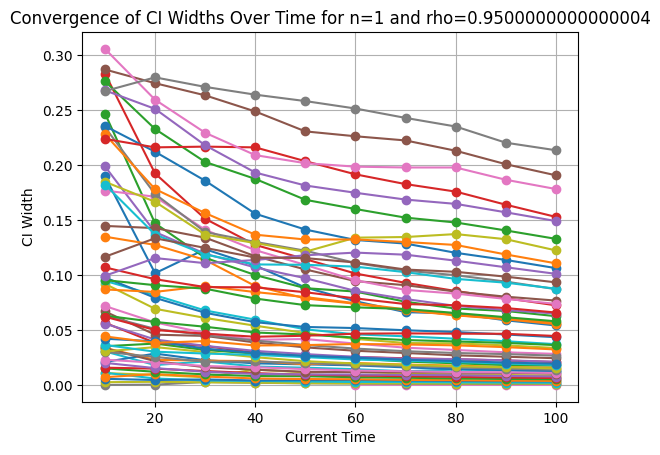

In [127]:
# Example: Select n and rho for convergence analysis

for n in [1,2,4]:
    for rho in sim_results_clean['rho'].unique():


        # Store CI widths for increasing current time
        ci_widths_over_time = []

        # Iterate over time steps
        for t_step in range(1, time_steps + 1):
            current_time_limit = step_size * t_step

            # Filter samples for the current time limit
            filtered_samples = sim_results_clean[(sim_results_clean['n'] == n) & 
                                                (sim_results_clean['rho'] == rho) & 
                                                (sim_results_clean['arr_time'] <= current_time_limit)]
            print(filtered_samples)

            # Check if there are enough samples to calculate the CI
            if len(filtered_samples) > 1:
                # Calculate the confidence interval
                ci = st.norm.interval(confidence=0.95, loc=filtered_samples['wait_delta'].mean(), scale=filtered_samples['wait_delta'].sem())
                ci_width = ci[1] - ci[0]
                ci_widths_over_time.append(ci_width)
            else:
                ci_widths_over_time.append(None)

        # Plot CI widths over time
        plt.plot([step_size * t for t in range(1, time_steps + 1)], ci_widths_over_time, marker='o')
        plt.xlabel('Current Time')
        plt.ylabel('CI Width')
        plt.title(f'Convergence of CI Widths Over Time for n={n_fixed} and rho={rho_fixed}')
        plt.grid(True)
plt.show()

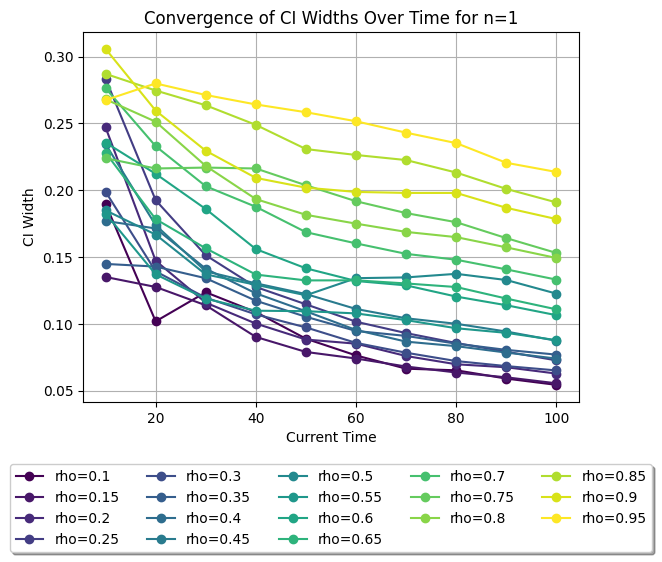

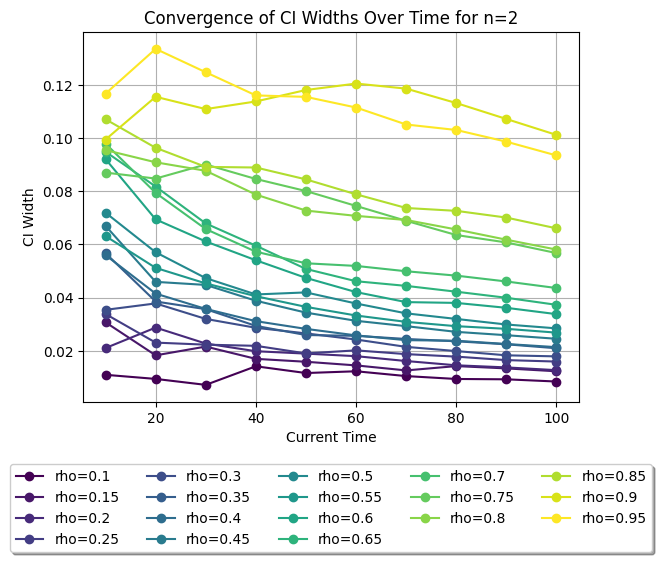

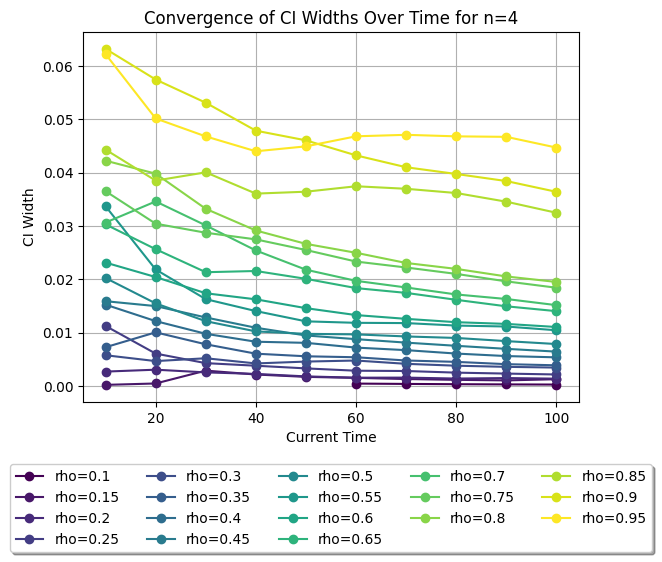

In [134]:
# Determine the number of unique rho values
num_rho_values = len(sim_results_clean['rho'].unique())

# Generate colors from a colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_rho_values))

# Example code (assuming sim_results_clean, step_size, time_steps are defined)

for n in [1, 2, 4]:
    # Create a new figure for each n
    plt.figure()

    # Iterate through each rho value and assign a color
    for i, rho in enumerate(sim_results_clean['rho'].unique()):
        # Round rho to three decimal places
        rho_rounded = round(rho, 3)

        # Store CI widths for increasing current time
        ci_widths_over_time = []

        # Iterate over time steps
        for t_step in range(1, time_steps + 1):
            current_time_limit = step_size * t_step

            # Filter samples for the current time limit
            filtered_samples = sim_results_clean[(sim_results_clean['n'] == n) & 
                                                (sim_results_clean['rho'] == rho) & 
                                                (sim_results_clean['arr_time'] <= current_time_limit)]

            # Check if there are enough samples to calculate the CI
            if len(filtered_samples) > 1:
                # Calculate the confidence interval
                ci = st.norm.interval(confidence=0.95, loc=filtered_samples['wait_delta'].mean(), scale=filtered_samples['wait_delta'].sem())
                ci_width = ci[1] - ci[0]
                ci_widths_over_time.append(ci_width)
            else:
                ci_widths_over_time.append(None)

        # Plot CI widths over time with label for each rounded rho
        # Use the ith color in the colors list, ensuring i is within the range
        plt.plot([step_size * t for t in range(1, time_steps + 1)], ci_widths_over_time, marker='o', label=f'rho={rho_rounded}', color=colors[i % num_rho_values])

    # Adding labels and title for each n
    plt.xlabel('Current Time')
    plt.ylabel('CI Width')
    plt.title(f'Convergence of CI Widths Over Time for n={n}')
    plt.grid(True)

    # Positioning the legend below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

    # Display the plot for each n
    plt.show()

In [ ]:
print(results[4][0.1][1])

{0: {'ci': (nan, nan), 'sample': 0.0}, 1: {'ci': (nan, nan), 'sample': 0.0}, 2: {'ci': (nan, nan), 'sample': 0.0}, 3: {'ci': (nan, nan), 'sample': 0.0}, 4: {'ci': (nan, nan), 'sample': 0.0}, 5: {'ci': (nan, nan), 'sample': 0.0}, 6: {'ci': (nan, nan), 'sample': 0.0}, 7: {'ci': (nan, nan), 'sample': 0.0}, 8: {'ci': (nan, nan), 'sample': 0.0}, 9: {'ci': (nan, nan), 'sample': 0.0}, 10: {'ci': (nan, nan), 'sample': 0.0}, 11: {'ci': (nan, nan), 'sample': 0.0}, 12: {'ci': (nan, nan), 'sample': 0.0}, 13: {'ci': (nan, nan), 'sample': 0.0}, 14: {'ci': (nan, nan), 'sample': 0.0}, 15: {'ci': (nan, nan), 'sample': 0.0}, 16: {'ci': (nan, nan), 'sample': 0.0}, 17: {'ci': (nan, nan), 'sample': 0.0}, 18: {'ci': (nan, nan), 'sample': 0.0}, 19: {'ci': (nan, nan), 'sample': 0.0}, 20: {'ci': (nan, nan), 'sample': 0.0}, 21: {'ci': (nan, nan), 'sample': 0.0}, 22: {'ci': (nan, nan), 'sample': 0.0}, 23: {'ci': (nan, nan), 'sample': 0.0}, 24: {'ci': (nan, nan), 'sample': 0.0}, 25: {'ci': (nan, nan), 'sample': 0